Importing Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importin The Dataset

In [54]:
data =  pd.read_csv("breast_cancer.csv")

In [55]:
 .head()

,Samplecodenumber,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


array([[<AxesSubplot: title={'center': 'Samplecodenumber'}>,
        <AxesSubplot: title={'center': 'Clump Thickness'}>,
        <AxesSubplot: title={'center': 'Uniformity of Cell Size'}>],
       [<AxesSubplot: title={'center': 'Uniformity of Cell Shape'}>,
        <AxesSubplot: title={'center': 'Marginal Adhesion'}>,
        <AxesSubplot: title={'center': 'Single Epithelial Cell Size'}>],
       [<AxesSubplot: title={'center': 'Bare Nuclei'}>,
        <AxesSubplot: title={'center': 'Bland Chromatin'}>,
        <AxesSubplot: title={'center': 'Normal Nucleoli'}>],
       [<AxesSubplot: title={'center': 'Mitoses'}>,
        <AxesSubplot: title={'center': 'Class'}>, <AxesSubplot: >]],
      dtype=object)

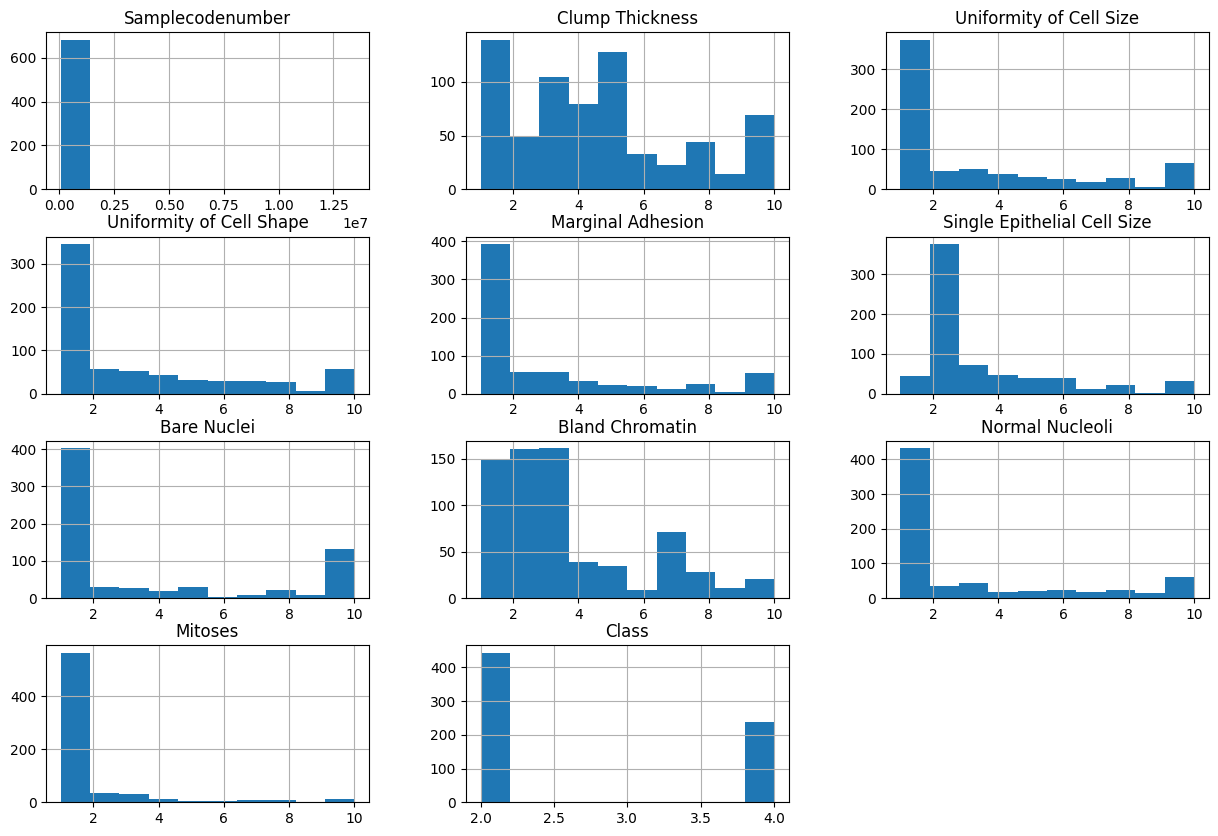

In [56]:
data.hist(figsize=(15,10))

The Sample code number field can be dropped since  it doesn't contribute to the  model

In [57]:
data = data.drop(['Samplecodenumber'], axis = 1)

Obtaining the dependent and independent variables

Here the dependent variable is class which denotes whether the tumor is malignant denotes by 4 or benign dentode by 2.

In [58]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Splitting the dataset into train and test data

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Training the logistic regression model on the training dataset

In [60]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Predicting the test results

In [61]:
y_pred = classifier.predict(X_test)

Confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103   4]
 [  5  59]]


Determining the accuracy of the model using K-Fold Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = classifier, X = X_test, y= y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard deviation: {:.2f} %".format(accuracy.std()*100))

Accuracy: 95.29 %
Standard deviation: 5.13 %


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

Applying XGBoost 

In [65]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0   0   0   0]
 [  0   0   0   0]
 [103   4   0   0]
 [  4  60   0   0]]


0.0

Accuracy

In [67]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.88 %
Standard Deviation: 2.79 %


Accuracy from applying XGboost is now 96.88 %